## Подключение библиотек и фреймворка Tensorflow для обучения моделя

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import Image

## Загружаем данные из файлов fashion-mnist_test.csv и fashion-mnist_train.csv

Для начала обсудим данные. mnist датасет состоит из черно-белых изображений цифр размером  28×28  пикселей.

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

## Смотрим на данные

In [3]:
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Загружая набор данных мы получаем метаданные, обучающий набор данных и тестовый набор данных.

Модель обучается на наборе данных из `train`
Модель тестируется на наборе данных из `test`

Изображения представляют собой двумерные массивы 28х28, где значения в каждой ячейке могут быть в интервале [0, 255]. Метки — массив целых чисел, где каждое значение в интервале [0, 9]. Эти метки соответствуют выходному классу изображения следующим образом:

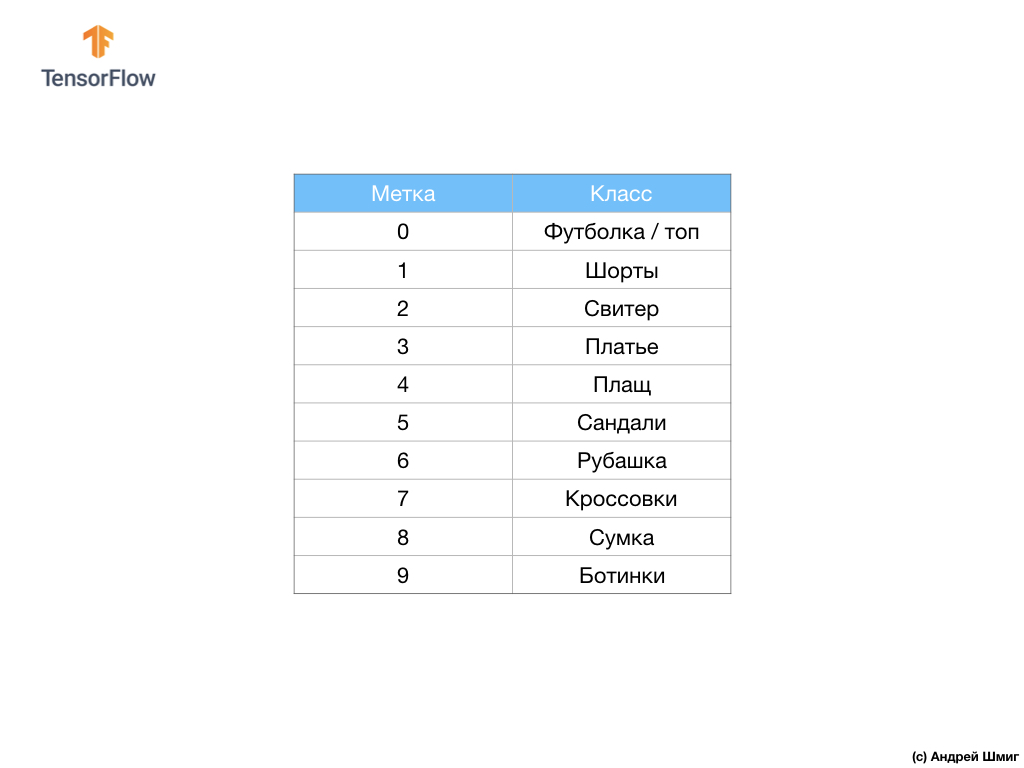

In [5]:
Image('label_class.jpeg')

## Начнём подготовку данных для обучения.
Подготовливаем тренировочную и тестовую выборку
Следующий код покажет, что 60 000 изображений находятся в обучающем наборе данных, а 10 000 изображений в тестовом наборе:

In [3]:
x_train = train.drop('label', axis=1).values
y_train = train.label
x_test = test.drop('label', axis=1).values
y_test = test.label
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Значение каждого пикселя в изображении находится в интервале [0,255]. Для того, чтобы модель работала корректно эти значения необходимо нормализовать — привести к значениям в интервале [0,1]
Так как у нас 10 классов заведём переменную num_classes.
Далее, переведите y_train и y_test в one-hot представление, используя функцию tf.keras.utils.to_categorical.

In [17]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
num_classes = 10
y_train1 = tf.keras.utils.to_categorical(y_train, num_classes)
y_test1 = tf.keras.utils.to_categorical(y_test, num_classes)
X_TRAIN = x_train.reshape(60000, 28, 28, 1)
X_TEST = x_test.reshape(10000, 28, 28, 1)

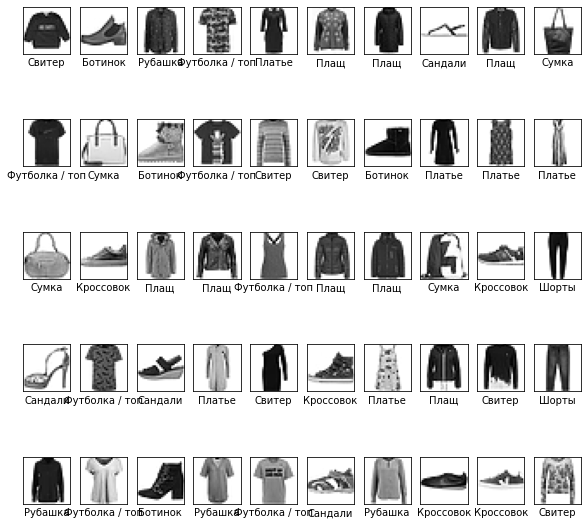

In [19]:
class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]
plt.figure(figsize = (10,10))
for i in range(50):
    plt.subplot(5,10,i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(X_TRAIN[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Каждое изображение относится к одной метке. Так как наименования классов не содержатся в исходном наборе данных, давайте сохраним их для дальнейшего использования, когда будем отрисовывать изображения:

## Строим модель
Построение нейронной сети требует настройки слоёв, а затем сборки модели с функциями оптимизации и потерь.

## Настраиваем слои
Базовым элементом при построении нейронной сети является слой. Слой извлекает представление из данных, которые поступили ему на вход. Результатом работы связанных нескольких слоёв мы получаем представление, которое имеет смысл для решения поставленной задачи.

Большую часть времени занимаясь глубоким обучением вы будете заниматься созданием связей между простыми слоями. Большинство слоёв, например, такие как tf.keras.layers.Dense имеют набор параметров, которые могут быть «подогнаны» во время процесса обучения.

## Компилируем модель
Перед тем как мы приступим к тренировке модели стоит ещё выполнить несколько настроек. Эти настройки производятся во время сборки модели при вызове метода compile: функция потерь — алгоритм измерения того, насколько далеко находится желаемое значение от спрогнозированного. функция оптимизации — Стохастический градиентный спуск (SGD);метрики — используются для мониторинга процесса тренировки и тестирования.

## Логическая регрессия 

In [6]:
def log_reg(input_shape):
    model = Sequential()
    model.add(Dense(num_classes, activation='softmax', input_shape=input_shape))
    model.compile(
        loss='categorical_crossentropy',
        optimizer='sgd',
        metrics=['accuracy']
    )
    return model

## Тренируем модель

In [33]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model = log_reg((784,))
history = model.fit(x_train, y_train1, validation_split=0.2,
                      epochs=30, callbacks=[callback], verbose=0)

## Визуализация зависимости accuracy от количества эпох.

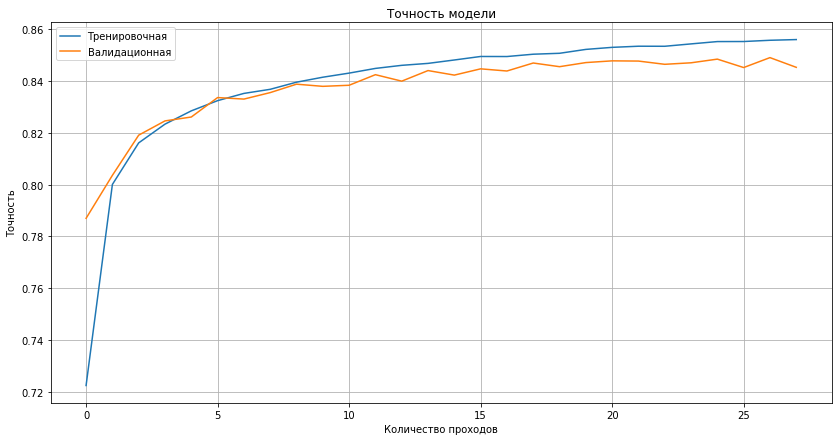

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочная', 'Валидационная'], loc='upper left')
plt.grid()
plt.show()

## Визуализация зависимости loss от количества эпох.

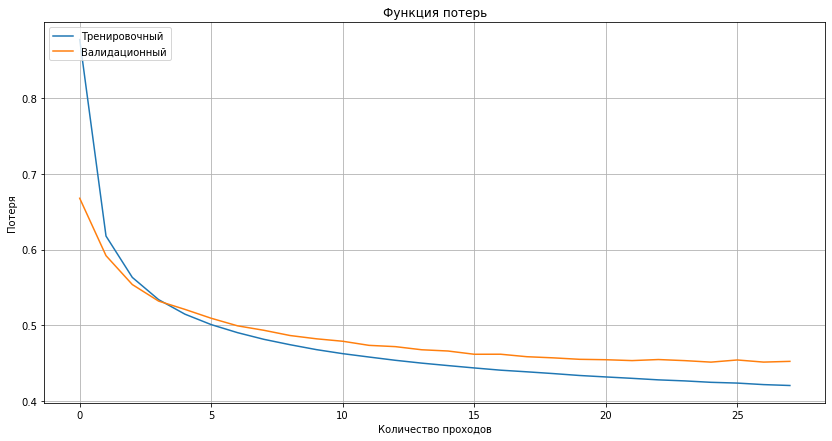

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Функция потерь')
plt.ylabel('Потеря')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочный', 'Валидационный'], loc='upper left')
plt.grid()
plt.show()

In [14]:
print('Тестирование:')
scores = model.evaluate(x_test, y_test1, verbose = 0)
print("%s: %.3f%%" % (model.metrics_names[0], scores[0])) # loss (потери)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) # acc (точность)

Тестирование:
loss: 0.444%
accuracy: 85.13%


In [15]:
p = model.predict(x_test)
pred = np.argmax(p, axis=1)

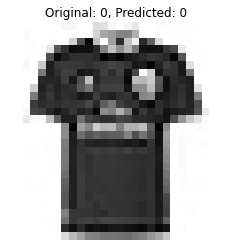

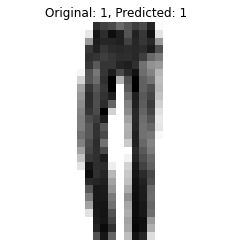

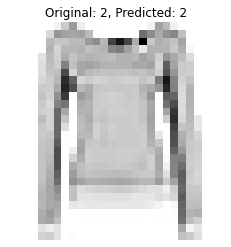

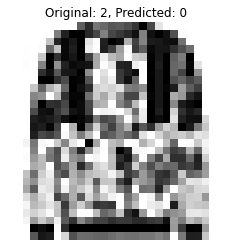

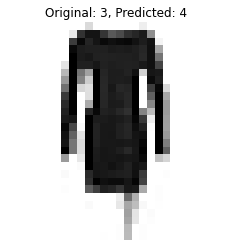

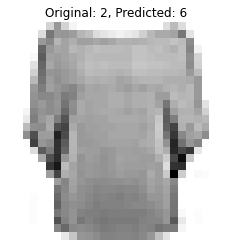

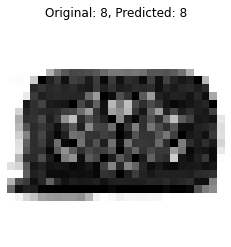

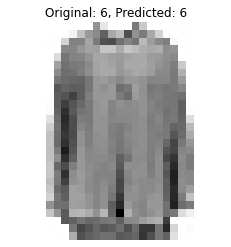

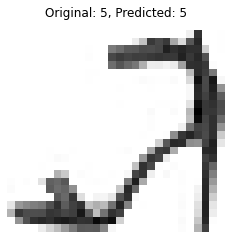

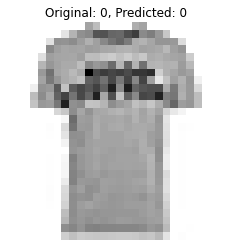

<Figure size 432x288 with 0 Axes>

In [20]:
for i in range(10):
  plt.imshow(X_TEST[i], cmap="binary")
  plt.title('Original: {}, Predicted: {}'.format(y_test[i], pred[i]))
  plt.axis("Off")
  plt.figure()

## Полносвязная нейронная сеть.

## Сеть состоит из трёх слоёв:
входного tf.keras.layers.Flatten — этот слой преобразует изображения размером 28х28 пикселей в 1D-массив размером 784 (28 * 28). На этом слое у нас нет никаких параметров для обучения, так как этот слой занимается только преобразованием входных данных.
скрытый слой tf.keras.layers.Dense — плотносвязный слой из 128 нейронов. Каждый нейрон (узел) принимает на вход все 784 значения с предыдущего слоя, изменяет входные значения согласно внутренним весам и смещениям во время тренировки и возвращает единственное значение на следующий слой.
выходной слой ts.keras.layers.Dense — softmax-слой состоит из 10 нейронов, каждый из которых представляет определённый класс элемента одежды. Как и в предыдущем слое, каждый нейрон принимает на вход значения всех 128 нейронов предыдущего слоя. Веса и смещения каждого нейрона на этом слое изменяются при обучении таким образом, чтобы результатирующее значение было в интервале [0,1] и представляло собой вероятность того, что изображение относится к этому классу. Сумма всех выходных значений 10 нейронов равна 1.

In [23]:
def neural_network(input_shape):
    model = tf.keras.models.Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer='sgd', 
                  metrics=['accuracy'])
    return model

In [36]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model1 = neural_network((28, 28, 1))
history1 = model1.fit(X_TRAIN, y_train1, validation_split=0.2,
                      epochs=30, callbacks=[callback], verbose=0)

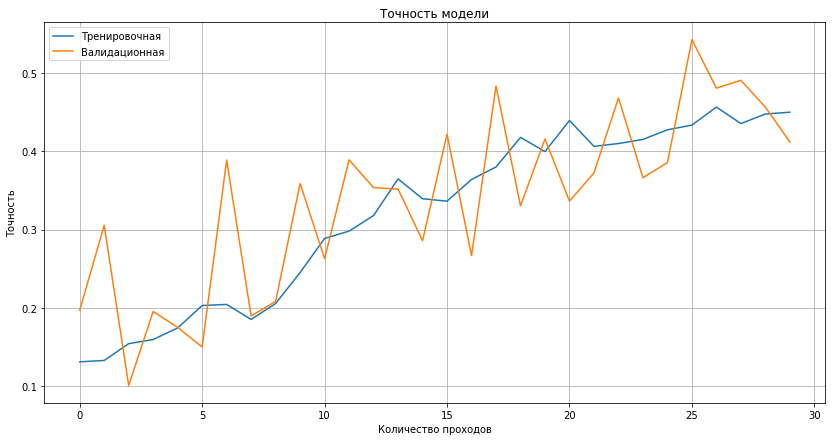

In [37]:
plt.figure(figsize=(14, 7))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочная', 'Валидационная'], loc='upper left')
plt.grid()
plt.show()

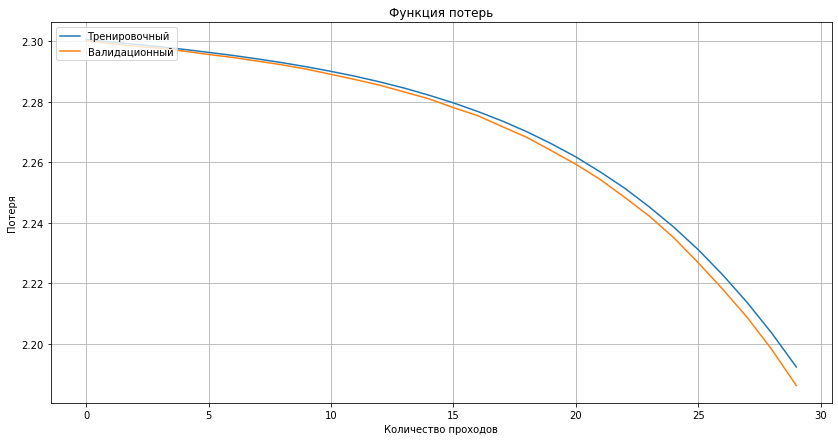

In [38]:
plt.figure(figsize=(14, 7))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Функция потерь')
plt.ylabel('Потеря')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочный', 'Валидационный'], loc='upper left')
plt.grid()
plt.show()

In [40]:
print('Тестирование:')
scores1 = model1.evaluate(X_TEST, y_test1, verbose = 0)
print("%s: %.3f%%" % (model1.metrics_names[0], scores[0])) # loss (потери)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100)) # acc (точность)

Тестирование:
loss: 0.444%
accuracy: 85.13%


In [41]:
p1 = model1.predict(X_TEST)
pred1 = np.argmax(p1, axis=1)

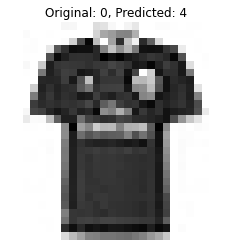

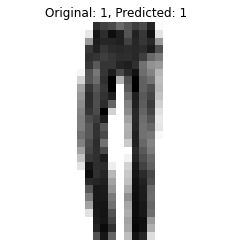

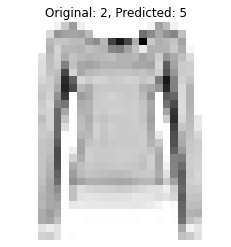

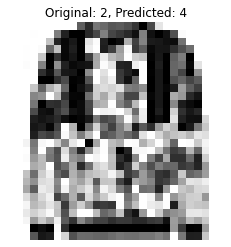

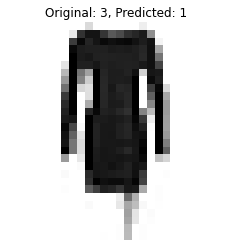

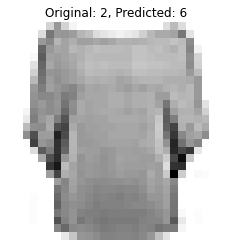

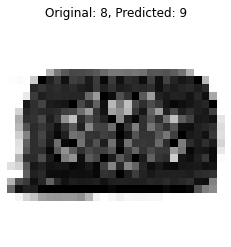

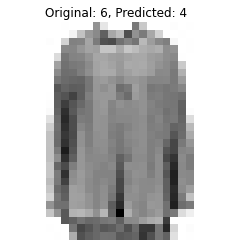

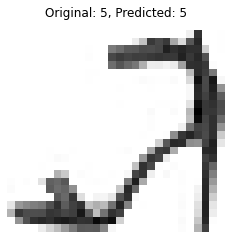

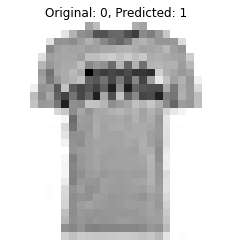

<Figure size 432x288 with 0 Axes>

In [42]:
for i in range(10):
  plt.imshow(X_TEST[i], cmap="binary")
  plt.title('Original: {}, Predicted: {}'.format(y_test[i], pred1[i]))
  plt.axis("Off")
  plt.figure()

## Сверточная нейронная сеть
Далее, вам предлагается реализовать сверточную нейронную сеть.

Размерность входного слоя (28,28,1).
Сверточный слой с 32 каналами, ядро свертки 3×3.
Макспулинг слой (2,2).
Сверточный слой с 64 каналами, ядро свертки 3×3.
Макспулинг слой (2,2).
Понижение размерности признаков.
Полносвязный слой с 64 нейронами
Выходной слой с количеством нейронов равному количеству классов.
Для этого предлагается использовать следующие классы Convolution2D, MaxPooling2D и Flatten для понижения размерности признаков. Все эти классы как и слой полносвязной нейронной сети Dense находятся в tf.keras.layers. Используйте ReLU в качестве функции активации во всех слоях, где это потребуется, кроме выходного, в нем по аналогии с прошлым заданием используется softmax. Аналогичная ситуация с функцией compile после добавления слоев.

In [34]:
def conv_net(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=input_shape, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer= 'sgd', 
                  metrics=['accuracy'])
    return model

In [44]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model2 = conv_net((28, 28, 1))
history2 = model2.fit(X_TRAIN, y_train1, validation_split=0.2,
                  epochs=30, callbacks=[callback], verbose=0)


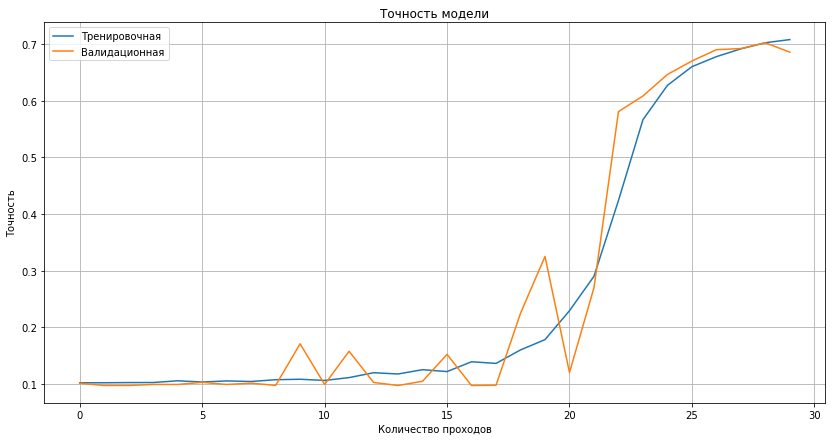

In [45]:
plt.figure(figsize=(14, 7))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочная', 'Валидационная'], loc='upper left')
plt.grid()
plt.show()

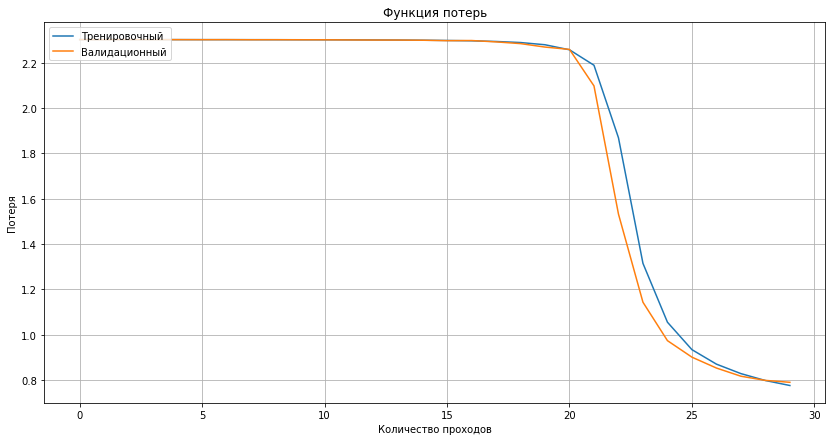

In [46]:
plt.figure(figsize=(14, 7))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Функция потерь')
plt.ylabel('Потеря')
plt.xlabel('Количество проходов')
plt.legend(['Тренировочный', 'Валидационный'], loc='upper left')
plt.grid()
plt.show()

In [47]:
print('Тестирование:')
scores2 = model1.evaluate(X_TEST, y_test1, verbose = 0)
print("%s: %.3f%%" % (model2.metrics_names[0], scores[0])) # loss (потери)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100)) # acc (точность)

Тестирование:
loss: 0.444%
accuracy: 85.13%


In [48]:
p2 = model2.predict(X_TEST)
pred2 = np.argmax(p2, axis=1)

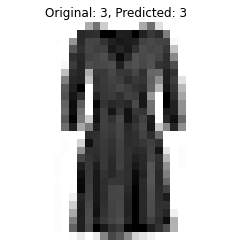

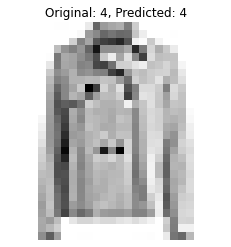

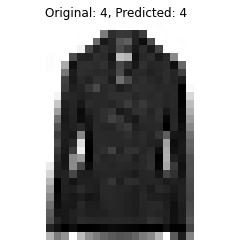

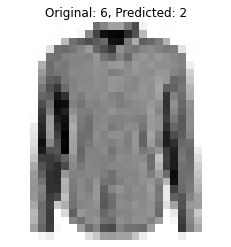

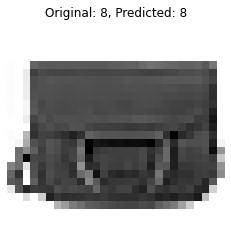

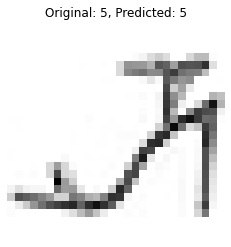

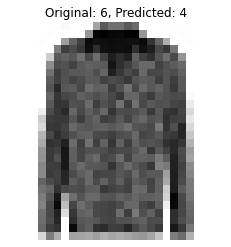

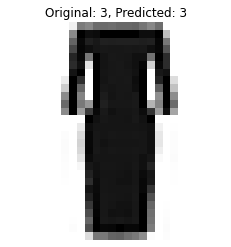

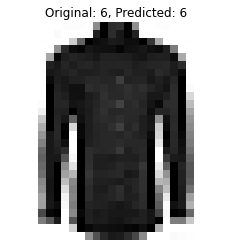

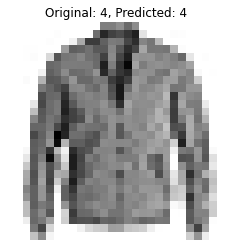

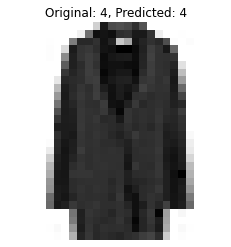

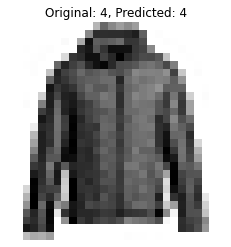

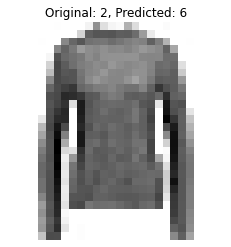

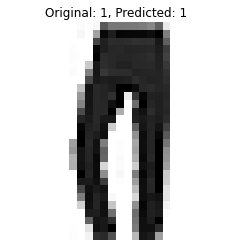

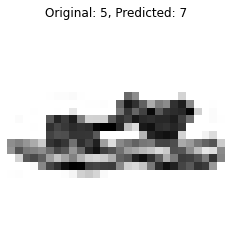

<Figure size 432x288 with 0 Axes>

In [49]:
for i in range(10, 25):
  plt.imshow(X_TEST[i], cmap="binary")
  plt.title('Original: {}, Predicted: {}'.format(y_test[i], pred2[i]))
  plt.axis("Off")
  plt.figure()